# Artificial Neural Network

### Importing the libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
print(tf.__version__)

2.10.1


In [11]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_row',100)

In [93]:
np.set_printoptions(edgeitems=10, suppress=True,linewidth=120)

In [47]:
np.get_printoptions()

{'edgeitems': 5,
 'threshold': 1000,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': True,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}

## Part 1 - Data Preprocessing

### Importing the dataset

In [81]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [82]:
X

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73],
       ...,
       [714, 'Germany', 'Male', 33, 3, 35016.6, 1, 1, 0, 53667.08],
       [597, 'France', 'Female', 53, 4, 88381.21, 1, 1, 0, 69384.71],
       [726, 'Spain', 'Male', 36, 2, 0.0, 1, 1, 0, 195192.4],
       [644, 'France', 'Male', 28, 7, 155060.41, 1, 1, 0, 29179.52],
       [800, 'France', 'Female', 29, 

In [26]:
y

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, ..., 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

### Encoding categorical data

Label Encoding the "Gender" column

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2]= le.fit_transform(X[:, 2])

In [84]:
X

array([[619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 1, 27, 2, 134603.88, 1, 1, 1, 71725.73],
       ...,
       [714, 'Germany', 1, 33, 3, 35016.6, 1, 1, 0, 53667.08],
       [597, 'France', 0, 53, 4, 88381.21, 1, 1, 0, 69384.71],
       [726, 'Spain', 1, 36, 2, 0.0, 1, 1, 0, 195192.4],
       [644, 'France', 1, 28, 7, 155060.41, 1, 1, 0, 29179.52],
       [800, 'France', 0, 29, 2, 0.0, 2, 0, 0, 167773.55],
       [771, 'France', 1, 39, 5, 0.0, 2, 1, 0, 96270.64],
    

One Hot Encoding the "Geography" column

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

OrdinalEncoder : encode categorical with order i.e. small, medium, large <br>
OneHotEncoder: encode categorical without order

In [86]:
ct.get_feature_names_out()

array(['encoder__x1_France', 'encoder__x1_Germany', 'encoder__x1_Spain',
       'remainder__x0', 'remainder__x2', 'remainder__x3', 'remainder__x4',
       'remainder__x5', 'remainder__x6', 'remainder__x7', 'remainder__x8',
       'remainder__x9'], dtype=object)

In [87]:
X

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73],
       ...,
       [0.0, 1.0, 0.0, 714, 1, 33, 3, 35016.6, 1, 1, 0, 53667.08],
       [1.0, 0.0, 0.0, 597, 0, 53, 4, 88381.21, 1, 1, 0, 69384.71],
       [0.0, 0.0, 1.0, 726, 1, 36, 2, 0.0, 1, 1, 0, 195192.4],
       [1.0, 0.0, 0.0, 644, 1, 28, 7, 155060.41, 1, 1, 0, 29179.52],
       [1.0, 0.0, 0.0, 800, 0, 29, 2, 0.0, 2, 0, 

### Splitting the dataset into the Training set and Test set

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

do Feature scaling for ALL columns

In [96]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,  0.00666099, -1.21571749,
         0.8095029 ,  0.64259497, -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, -2.30455945,  0.91601335,  0.30102557, -1.37744033, -0.00631193,
        -0.92159124,  0.64259497,  0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, -1.19119591, -1.09168714, -0.94312892, -1.031415  ,  0.57993469,
        -0.92159124,  0.64259497, -1.03227043,  1.48533467],
       [-1.01460667, -0.5698444 ,  1.74309049,  0.03556578,  0.91601335,  0.10961719,  0.00666099,  0.47312769,
        -0.92159124,  0.64259497, -1.03227043,  1.27652776],
       [-1.01460667, -0.5698444 ,  1.74309049,  2.05611444, -1.09168714,  1.73658844,  1.04473698,  0.8101927 ,
         0.8095029 ,  0.64259497,  0.9687384 ,  0.55837842],
       [-1.01460667,  1.75486502, -0.57369368,  1.29325423, -1.09168714, -0.17749539, -1.031415  ,  0.44253504,
         0.8095029 ,  0

In [97]:
X_test

array([[-1.01460667,  1.75486502, -0.57369368, -0.55204276, -1.09168714, -0.36890377,  1.04473698,  0.8793029 ,
        -0.92159124,  0.64259497,  0.9687384 ,  1.61085707],
       [ 0.98560362, -0.5698444 , -0.57369368, -1.31490297, -1.09168714,  0.10961719, -1.031415  ,  0.42972196,
        -0.92159124,  0.64259497, -1.03227043,  0.49587037],
       [-1.01460667, -0.5698444 ,  1.74309049,  0.57162971, -1.09168714,  0.30102557,  1.04473698,  0.30858264,
        -0.92159124,  0.64259497,  0.9687384 , -0.42478674],
       [ 0.98560362, -0.5698444 , -0.57369368,  1.41696129,  0.91601335, -0.65601634, -0.33936434,  0.57533623,
        -0.92159124, -1.55619021, -1.03227043, -0.18777657],
       [-1.01460667,  1.75486502, -0.57369368,  0.57162971,  0.91601335, -0.08179119,  0.00666099,  1.38961097,
         0.8095029 ,  0.64259497,  0.9687384 ,  0.61684179],
       [-1.01460667, -0.5698444 ,  1.74309049,  0.20050853, -1.09168714,  1.73658844, -0.68538967,  1.5900207 ,
         0.8095029 ,  0

## Part 2 - Building the ANN

### Initializing the ANN

https://stackoverflow.com/questions/66879748/what-is-the-difference-between-tf-keras-model-and-tf-keras-sequential

An Sequential model is the simplest type of model, a linear stack of layers. But there are some flaws in using the sequential model API, it's limited in certain points. We can't build complex networks such as multi-input or multi-output networks using this API.

But using Model class, we can instantiate a Model with the Functional API (and also with Subclassing the Model class) that allows us to create arbitrary graphs of layers. From this, we can get more flexibility and easily define models where each layer can connect not just with the previous and next layers but also share feature information with other layers in the model, for example, model-like ResNet, EfficientNet.

In fact, most of the SOTA model that you can get from tf.keras.applications is basically implemented using the Functional API. However, in subclassing API, we define our layers in __init__ and we implement the model's forward pass in the call method.

Generally speaking, all the model definitions using Sequential API, can be achieved in Functional API or Model Subclassing API. And in Functional API or Model Subclassing API, we can create complex layers that not possible to achieve in Sequential API. If you wondering which one to choose, the answer is, it totally depends on your need. However, check out the following blog post where we have discussed the various model strategies in tf. keras with more examples. Model Sub-Classing and Custom Training Loop from Scratch in TensorFlow 2

In [98]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

https://www.tensorflow.org/api_docs/python/tf/keras/activations
i.e.
- linear
- relu
- selu
- sigmoid
- softmax
- softplus
- tanh
- etc.

In [101]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [102]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [103]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Adam
- SGD
- RMSprop
- etc.

https://www.tensorflow.org/api_docs/python/tf/keras/losses
- BinaryCrossentropy
- MAE
- MSE
- MAPE
- Poisson
- etc.

https://www.tensorflow.org/api_docs/python/tf/keras/metrics
- AUC
- Accuracy
- Mean
- MeanAbsoluteError
- Poisson
- R2Score

In [107]:
ann.compile(optimizer='Adam',loss='BinaryCrossentropy', metrics=['Accuracy'])

### Training the ANN on the Training set

In [108]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 20s 9ms/step - loss: 0.5234 - Accuracy: 0.7954
Epoch 2/100
250/250 [==============================] - 2s 9ms/step - loss: 0.4641 - Accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4454 - Accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 2s 9ms/step - loss: 0.4320 - Accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4182 - Accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3998 - Accuracy: 0.8224
Epoch 7/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3795 - Accuracy: 0.8404
Epoch 8/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3685 - Accuracy: 0.8426
Epoch 9/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3630 - Accuracy: 0.8450
Epoch 10/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3599 - Accur

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [18]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [31]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [30]:
y_pred = ann.predict(X_test)
y_pred = (y_pred> 0.5)
compare = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
compare

63/63 [==============================] - 0s 3ms/step


array([[0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       ...,
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

### Making the Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1523   72]
 [ 205  200]]


0.8615

https://scikit-learn.org/stable/api/sklearn.metrics.html

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1523   72]
 [ 205  200]]


0.8615

y-axis : true label (1,0)
x-axis : predicted label (1,0)

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

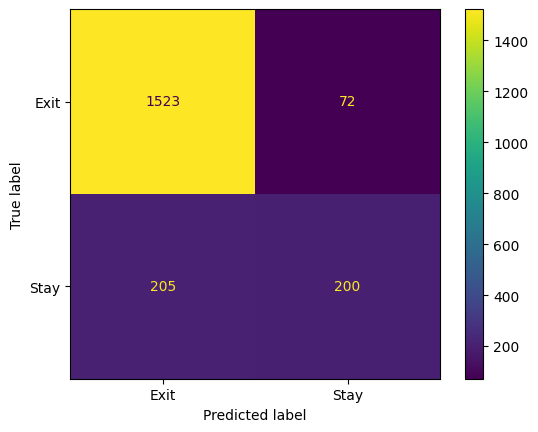

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= ["Exit","Stay"])
disp.plot()
plt.show()